Aппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [31]:
#импорт библиотек
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
from math import sin, exp

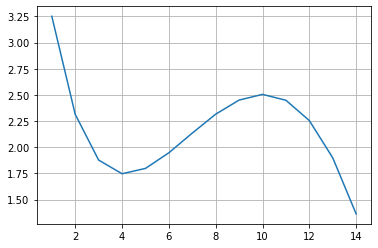

In [37]:
#строим график исходной функции
def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
x = np.arange(1, 15, 1)
y = np.array(list(f(x0) for x0 in x))
plt.grid(True)
plt.plot(x, y)

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

Веса
[ 3.43914511 -0.18692825]


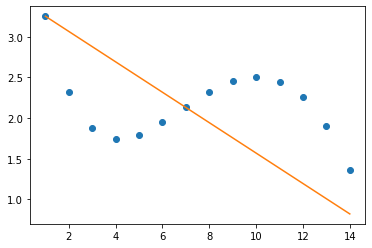

In [33]:
A1 = np.array([[1, 1], [1, 15]])
b1 = [f(1), f(15)]
w1 = solve(A1, b1)
print('Веса')
print(w1)

def f1(x, w1):
    return w1[0] + w1[1] * x
y1 = np.array(list(f1(x0, w1) for x0 in x))
plt.plot(x, y, 'o', x, y1, '-')

Многочлен первой степени явно не приближает данную функцию, так как он просто строит прямую через 2 имеющиеся точки и их значения c помощью линейной функции и не учитывает поведение функции между ними.

2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

Веса
[ 3.32512949 -0.06531159 -0.00760104]


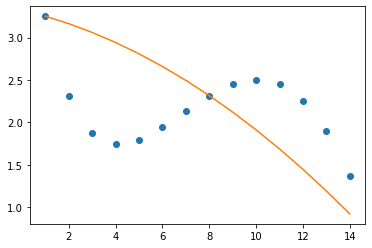

In [34]:
A2 = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
b2 = [f(1), f(8), f(15)]
w2 = solve(A2, b2)
print('Веса')
print(w2)

def f2(x, w2):
    return w2[0] + w2[1] * x + w2[2] * x * x
y2 = np.array(list(f2(x0, w2) for x0 in x))
plt.plot(x, y, 'o', x, y2, '-')

Данный подход также плохо аппромиксирует исходную функцию.

Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

Веса
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


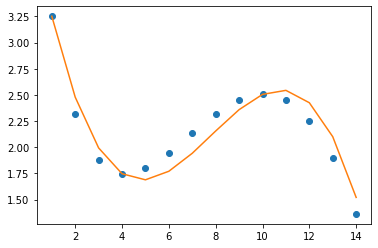

In [35]:
A3 = np.array([[1, 1, 1, 1], [1, 4, 4 ** 2, 4 ** 3], [1, 10, 10 ** 2, 10 ** 3], [1, 15, 15 ** 2, 15 ** 3]])
b3 = [f(1), f(4), f(10), f(15)]
w3 = solve(A3, b3)
print('Веса')
print(w3)

def f3(x, w3):
    return w3[0] + w3[1] * x + w3[2] * x * x + w3[3] * x * x * x
y3 = np.array(list(f3(x0, w3) for x0 in x))
plt.plot(x, y, 'o', x, y3, '-')

А многочлен 3 степени уже хорошо аппроксимирует функцию на данном участке, так как допускает 2 изгиба.

In [38]:
#Запишем полученные числа в файл, разделив пробелами. 
file = open('submission-2.txt', 'w')
file.write('%f %f %f %f'%(w3[0], w3[1], w3[2], w3[3]))
file.close()

In [ ]:
#Синхронная сортировка двух массивов по возрастанию элементов в первом
#Возвращает отсортированные массивы
def sync_sort2(x, y):
    indices = sorted(range(len(x)), key=lambda i: x[i])
    x = [x[i] for i in indices]
    y = [y[i] for i in indices]
    return x, y

#Синхронная сортировка трех массивов по возрастанию элементов в первом
#Возвращает отсортированные массивы
def sync_sort3(x, y, yd):
    indices = sorted(range(len(x)), key=lambda i: x[i])
    x = [x[i] for i in indices]
    y = [y[i] for i in indices]
    yd = [yd[i] for i in indices]
    return x, y, yd

#Выбор узлов из массивов x, y для полинома Ньютона степени n и вычисления y(x0)
#Возвращает массивы выбранных узлов
def prepare_arrays_newton(x, y, n, x0):
    #необходимо выбрать n + 1 узлов
    need_to_take = n + 1
    if need_to_take > len(x):
        print('ОШИБКА: не хватает точек для построения полинома Ньютона')
    #сортируем (чтобы верно выбрать ближайшие узлы)
    x, y = sync_sort2(x, y)
    #находим точку в таблице, которая ближе всего к x0, 
    #чтобы выбирать узлы вокруг неё
    closest_to_x0_i = (sorted(range(len(x)), key=lambda i: abs(x[i] - x0)))[0]
    #определяем индексы необходимых узлов в исходных массивах
    #если не удаетсся равномерно распределить узлы вокруг точки, выбираем из
    #того, что есть
    from_i = closest_to_x0_i - need_to_take // 2 
    if from_i < 0:
        from_i = 0   
    to_i = from_i + need_to_take 
    if to_i > len(x):
        to_i = len(x)
        from_i = to_i - need_to_take
    #формируем массивы из выбранных узлов    
    x_new = x[from_i : to_i]
    y_new = y[from_i : to_i]
    return x_new, y_new

#Выбор узлов из массивов x, y, yd для полинома Эрмита степени n и вычисления y(x0)
#Возвращает массивы выбранных узлов
def prepare_arrays_ermit(x, y, yd, n, x0):
    #при построении полинома Эрмита используются как значения функции, так и 
    #значения производных, поэтому необходимое количество точек вычисляется так
    need_to_take = (n // 2) + 1
    if need_to_take > len(x):
        print('ОШИБКА: не хватает точек для построения полинома Эрмита')
    #сортируем (чтобы верно выбрать ближайшие узлы)
    x, y, yd = sync_sort3(x, y, yd)
    #находим точку в таблице, которая ближе всего к x0, 
    #чтобы выбирать узлы вокруг неё
    closest_to_x0_i = (sorted(range(len(x)), key=lambda i: abs(x[i] - x0)))[0]
    #определяем индексы необходимых узлов в исходных массивах
    #если не удаетсся равномерно распределить узлы вокруг точки, выбираем из
    #того, что есть
    from_i = closest_to_x0_i - need_to_take // 2 
    if from_i < 0:
        from_i = 0   
    to_i = from_i + need_to_take
    if to_i > len(x):
        to_i = len(x)
        from_i = to_i - need_to_take
    #формируем массивы из выбранных узлов
    #при этом таблицу из x, y преобразуем к виду, удобному для отыскания
    #разделенных разностей согласно процедуре обработки полинома Ньютона.
    x_new = []
    y_new = []
    yd_new = []
    for i in range(from_i, to_i):
        x_new.append(x[i])
        x_new.append(x[i])
        y_new.append(y[i])
        y_new.append(y[i])
        yd_new.append(yd[i])
    return x_new, y_new, yd_new

#Поиск коэффициентов для интерполяционного полинома Ньютона n-й степени
#с использованием масивов узлов x, y
#Возвращает массив коэффициентов
def find_coeffs_newton(x, y, n):
    coeffs = [y[0]] #первое слагаемое - y(x[0])
    #step - шаг (номер столбца в таблице после y)
    for step in range(n):
        #i - строка столбца
        for i in range(n - step):
            #вычисление разделенной разности для y от (step + 2) переменных
            y[i] = (y[i + 1] - y[i])/(x[i + step + 1] - x[i]) 
        coeffs.append(y[0])
    return coeffs

#Поиск коэффициентов для интерполяционного полинома Эрмита n-й степени
#с использованием масивов узлов x, y, yd
#Формально строим полином Ньютона по (n // 2) + 1 узлам, каждый из которых 
#повторяется дважды
#Возвращает массив коэффициентов
def find_coeffs_ermit(x, y, yd, n):
    coeffs = [y[0]] #первое слагаемое - y(x[0])
    #step - шаг (номер столбца в таблице после y)
    for step in range(n):
        #i - строка столбца
        for i in range(n - step):
            #вычисление разделенной разности для y от (step + 2) переменных
            #на нулевом шаге (кратность 2) формулы для разделенных разностей 
            #получаются предельным переходом
            if (step == 0) and (i % 2 == 0):
                y[i] = yd[i // 2]
            else:
                y[i] = (y[i + 1] - y[i])/(x[i + step + 1] - x[i])
        coeffs.append(y[0])
    return coeffs

#Вычисление полинома степени n с коэффициентами coeffs по массиву x в точке x0
#Возвращает значение полинома в точке x0
def count_polynom(x, coeffs, n, x0):
    summ = 0
    #вычисление очередного слагаемого
    for stage in range(n + 1):
        summand = coeffs[stage]
        for i in range(stage):
            summand *= (x0 - x[i])
        #Формирование ответа
        summ += summand
    return summ

#Приближенное вычисление y(x0) c помощью полинома Ньютона n-й степени
#(объединение функций prepare_arrays_newton,find_coeffs_newton и count_polynom) 
#Возвращает значение полинома Ньютона в точке x0   
def approximate_newton(x, y, n, x0):
    x_newton, y_newton = prepare_arrays_newton(x, y, n, x0)
    coeffs = find_coeffs_newton(x_newton, y_newton, n)
    return count_polynom(x_newton, coeffs, n, x0)

#Нахожление корня функции с помощью обратной интерполяции 
#используя полином Ньютона.
def find_root_back_interp(x, y, n):
    return approximate_newton(y, x, n, 0)

#Приближенное вычисление y(x0) c помощью полинома Эрмита n-й степени
#(объединение функций prepare_arrays_ermit,find_coeffs_ermit и count_polynom) 
#Возвращает значение полинома Эрмита в точке x0   
def approximate_ermit(x, y, yd, n, x0):
    x_ermit, y_ermit, yd_ermit = prepare_arrays_ermit(x, y, yd, n, x0)
    coeffs = find_coeffs_ermit(x_ermit, y_ermit, yd_ermit, n)
    return count_polynom(x_ermit, coeffs, n, x0)
